# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [91]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [92]:
# from google.colab import drive
# drive.mount('/content/drive')

In [93]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [94]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('./data.pkl')
data.head()

,Date,taxi_num,call_num,success,mean_time,mean_fee,mean_dit,weekday,month,year,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,mean_time_7days,board_rate,taxi_rate,quarter,next_mean_time,next_holiday
0,2015-01-01,213,1023,924,23.2,2427,10764,Friday,1.0,2015.0,...,63.0,28.0,9.07,0.0,23.200,0.903226,0.208211,1,17.2,0.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,Saturday,1.0,2015.0,...,73.0,37.0,8.66,0.0,20.200,0.898987,0.132996,1,26.2,0.0
2,2015-01-03,209,1648,1514,26.2,2377,10198,Sunday,1.0,2015.0,...,89.0,58.0,5.32,0.0,22.200,0.918689,0.126820,1,24.5,0.0
3,2015-01-04,196,1646,1526,24.5,2431,10955,Monday,1.0,2015.0,...,95.0,52.0,6.48,0.0,22.775,0.927096,0.119077,1,26.2,0.0
4,2015-01-05,421,4250,3730,26.2,2214,8663,Tuesday,1.0,2015.0,...,98.0,29.0,10.47,0.0,23.460,0.877647,0.099059,1,23.6,0.0


In [97]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2921
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2922 non-null   datetime64[ns]
 1   taxi_num         2922 non-null   int64         
 2   call_num         2922 non-null   int64         
 3   success          2922 non-null   int64         
 4   mean_time        2922 non-null   float64       
 5   mean_fee         2922 non-null   int64         
 6   mean_dit         2922 non-null   int64         
 7   weekday          2922 non-null   object        
 8   month            2922 non-null   float64       
 9   year             2922 non-null   float64       
 10  day              2922 non-null   float64       
 11  temp_max         2922 non-null   float64       
 12  temp_min         2922 non-null   float64       
 13  rain(mm)         2922 non-null   float64       
 14  humidity_max(%)  2922 non-null   float64     

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [98]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [99]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

<Axes: xlabel='mean_time', ylabel='Density'>

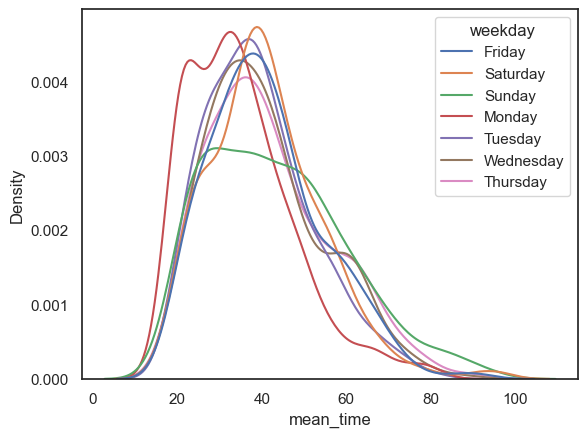

In [100]:
sns.kdeplot(x='mean_time', data=data, hue='weekday')

In [101]:
data['weekday'].value_counts()/data.shape[0]

weekday
Friday       0.143053
Saturday     0.143053
Tuesday      0.143053
Sunday       0.142710
Monday       0.142710
Wednesday    0.142710
Thursday     0.142710
Name: count, dtype: float64

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
call_num,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


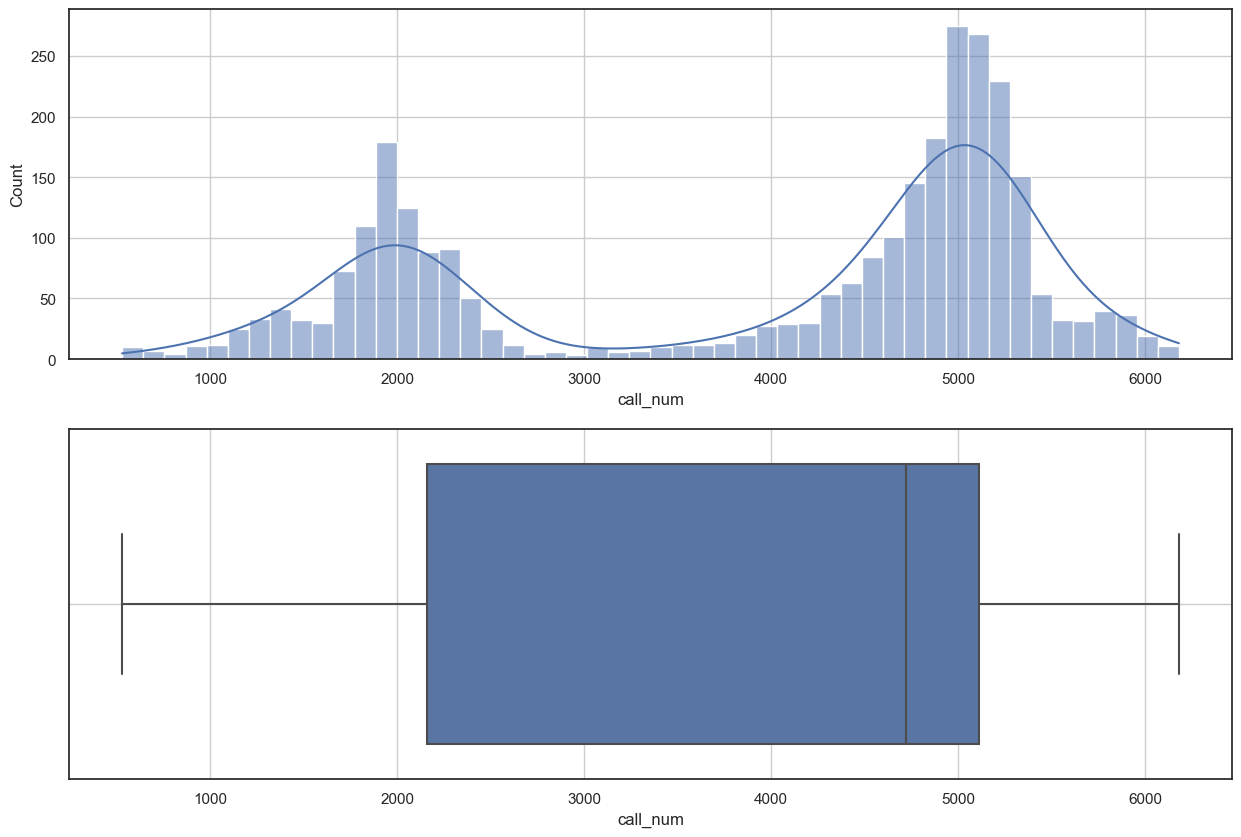

In [102]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'call_num'
hue = ''
eda_1_n(data, var, hue)


* 접수건이 크게 2000건과 5000건으로 나뉨
* 비율을 보니 주말여부에 따라 나뉠 수도 있음

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
mean_time,2922.0,40.30243,14.101169,17.2,29.6,38.2,48.6,96.1


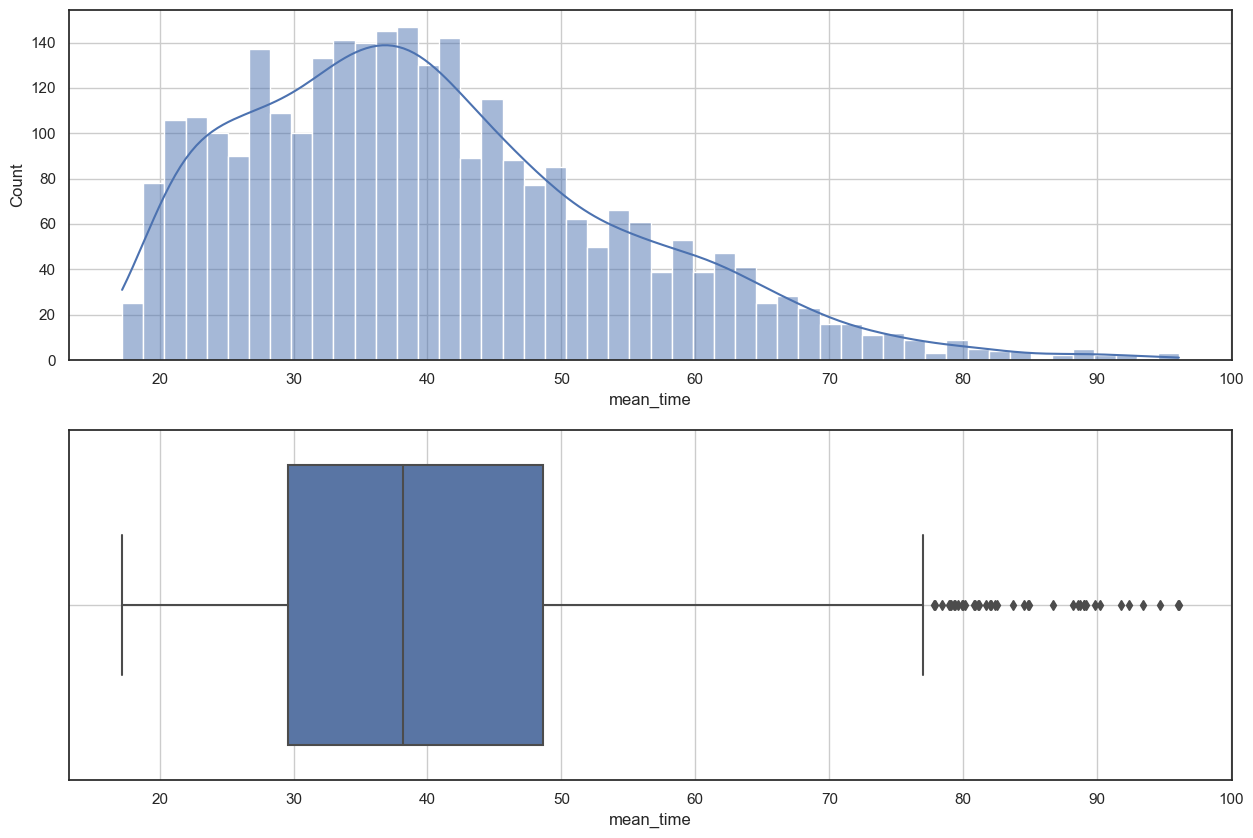

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'mean_time'
eda_1_n(data, var)

* 평균 대기시간은 40분으로 여전히 길지만, 그 이상 기다린 경우도 많음
* 어떤 요인이 대기시간을 늘리는지 파악 필요

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
mean_fee,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


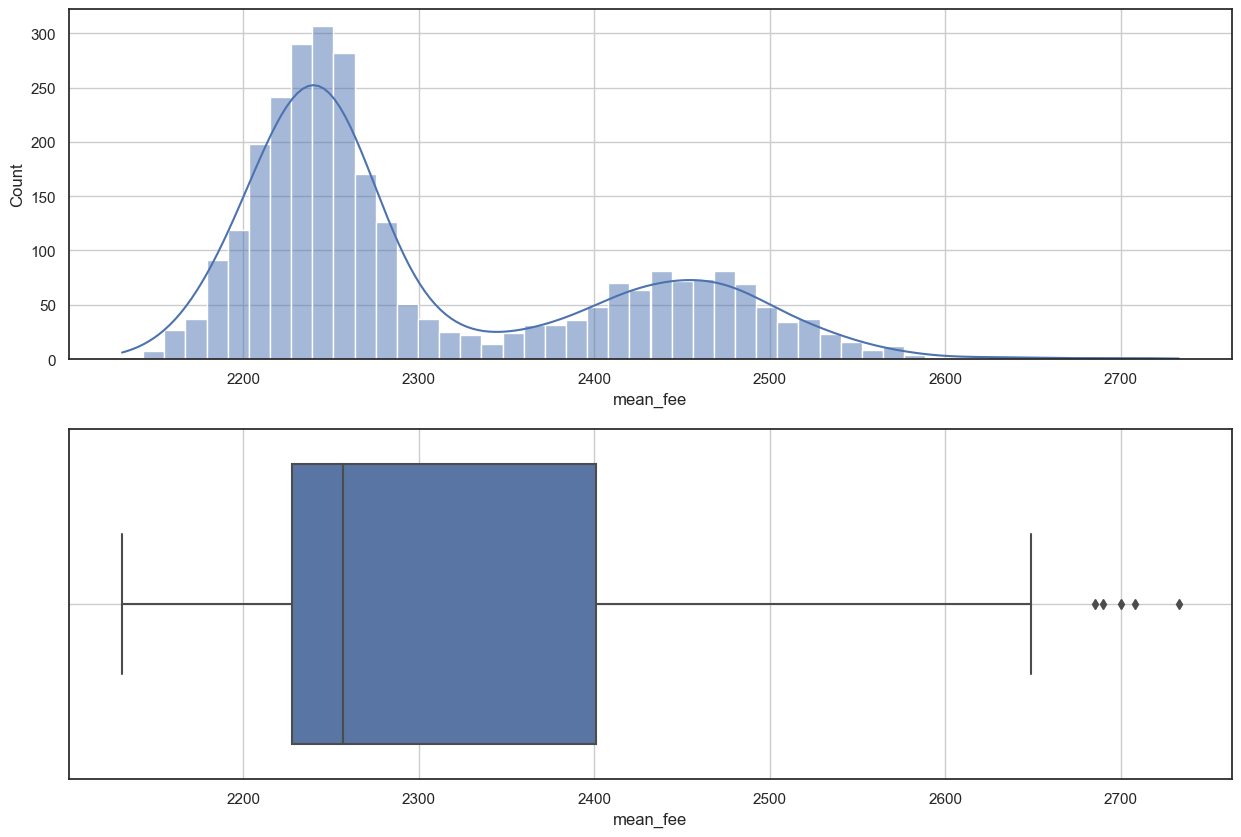

In [104]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'mean_fee'
eda_1_n(data,var)


* 비용 또한, 두 부분으로 나뉜다
* 요일별 이동거리를 비교해봤을 때, 주말에 이동거리가 더 많음에 따라 비용차이도 발생한 것으로 보임

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
mean_dit,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


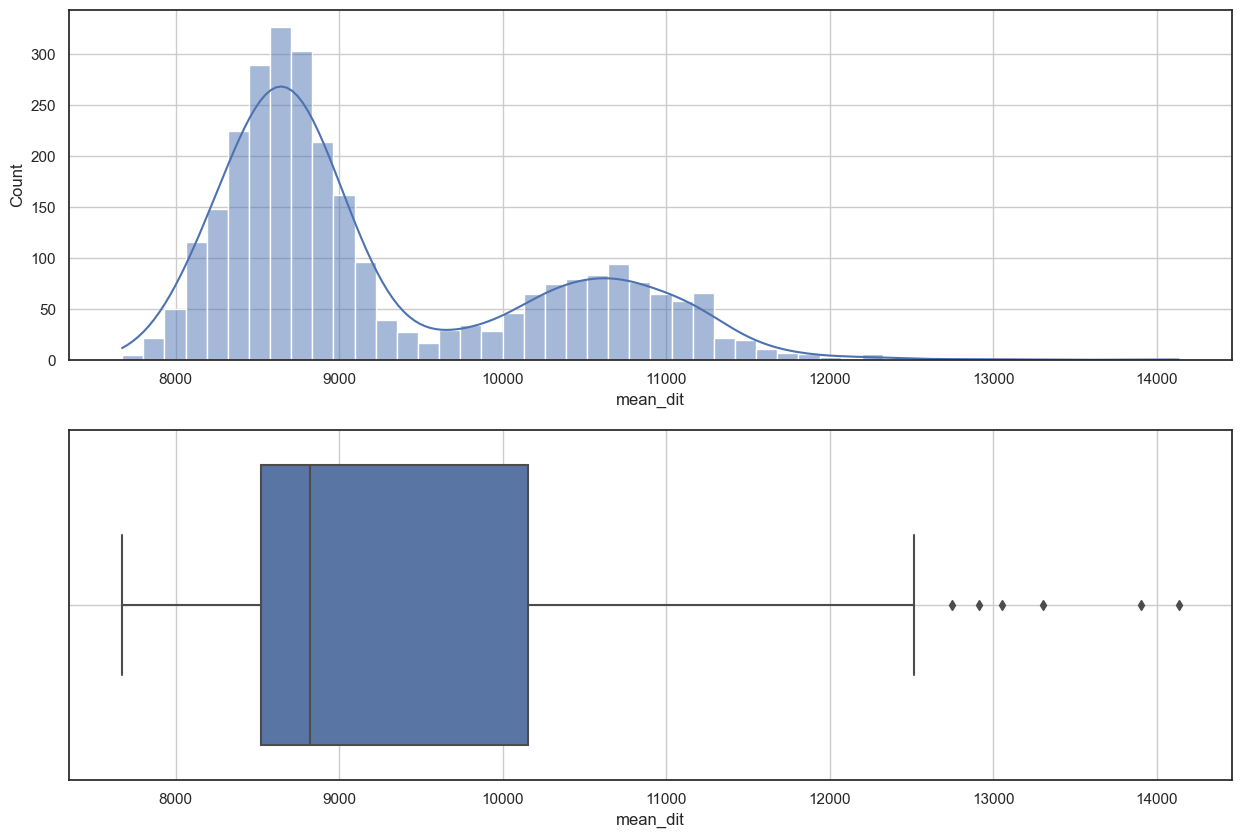

In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var='mean_dit'
eda_1_n(data,var)


* 거리와 비용은 비례한다. 따라서 이 역시 주말 여부에 따른 차이로 보여진다

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
board_rate,2922.0,0.841568,0.052176,0.596996,0.80596,0.845615,0.87772,0.968844


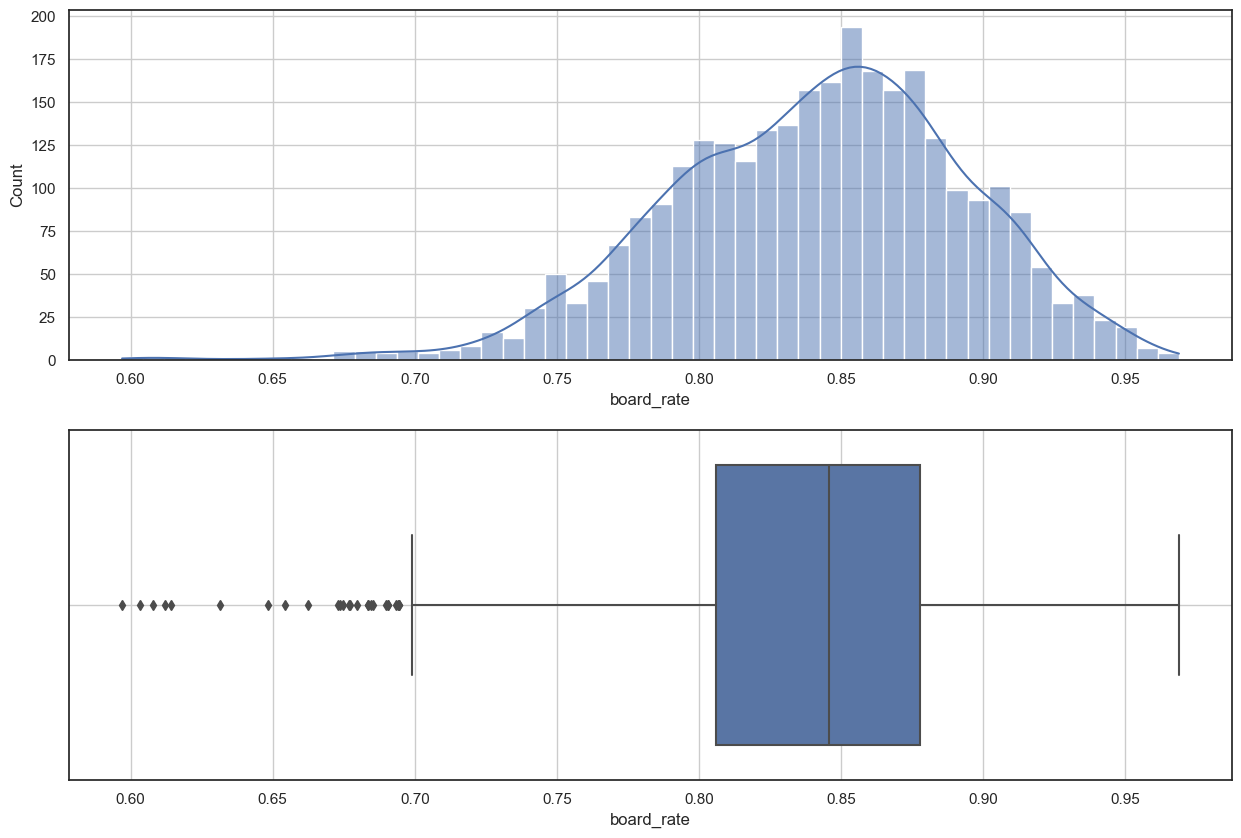

In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'board_rate'
eda_1_n(data,var)


* 탑승률이 100퍼센트가 되어야 한다. 접수건에 비해 택시가 제대로 할당되지 않는 것으로 보인다

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.079158,10.705241,-11.2,9.0,19.7,27.4,39.4


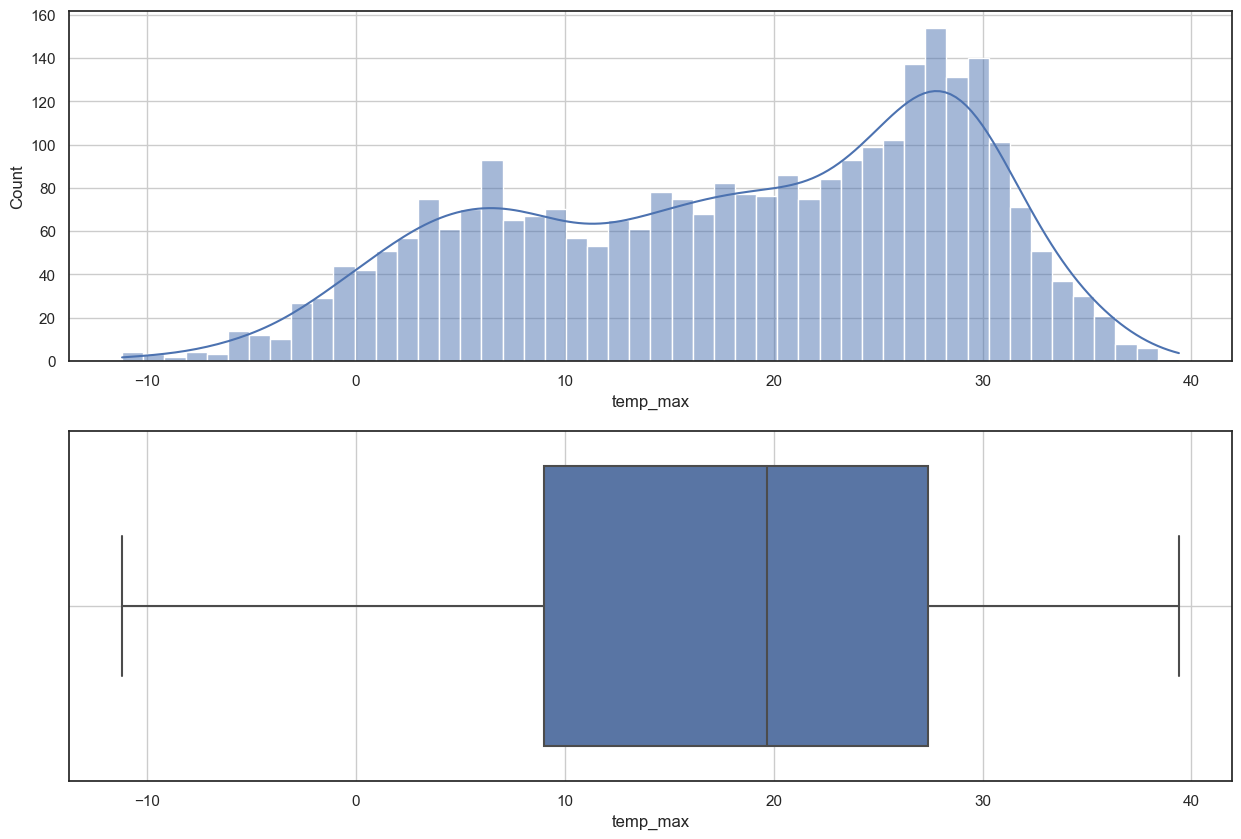

In [107]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
eda_1_n(data,var)

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


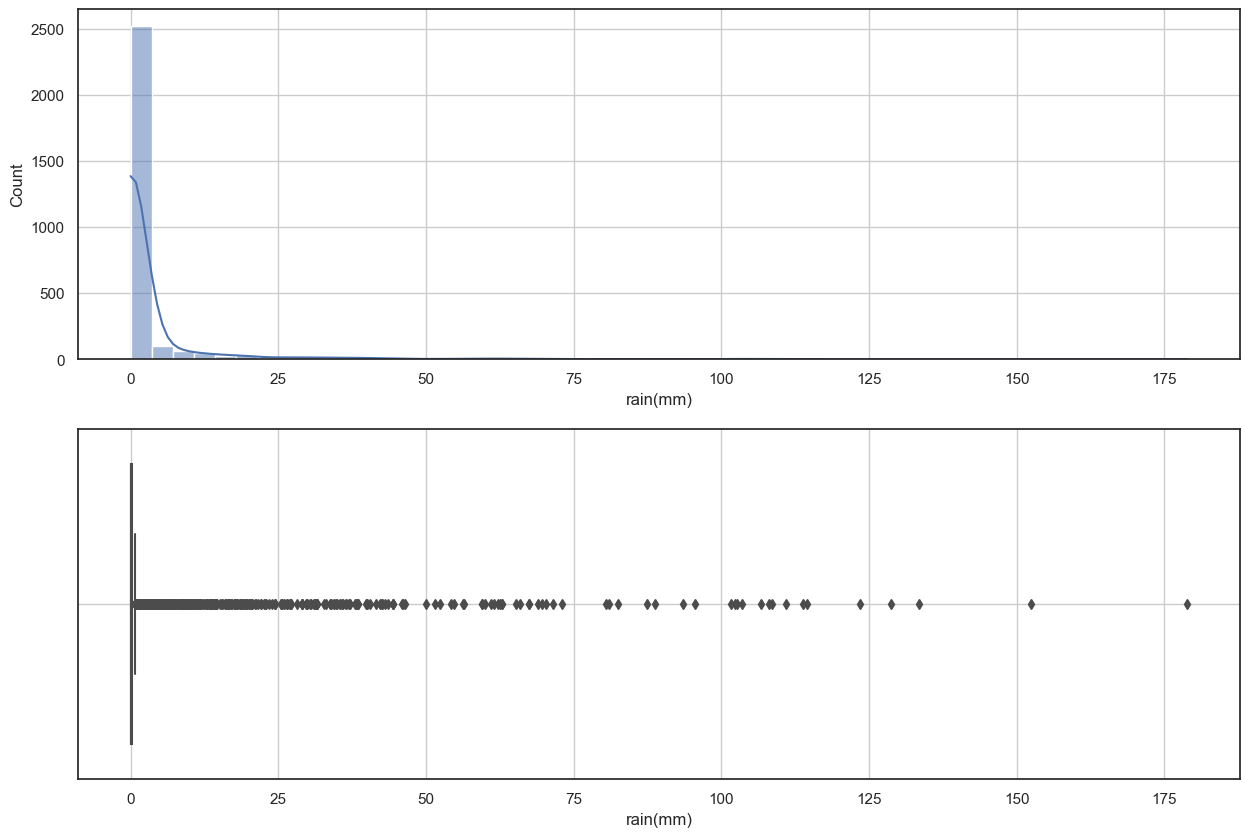

In [108]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
eda_1_n(data,var)


* 0.5 이하이거나 비가 안온경우 2300건
* 0.5mm 이상 온 경우 650 건

,count,mean,std,min,25%,50%,75%,max
rain(mm),647.0,15.068161,23.256836,0.6,2.0,6.0,17.55,178.9


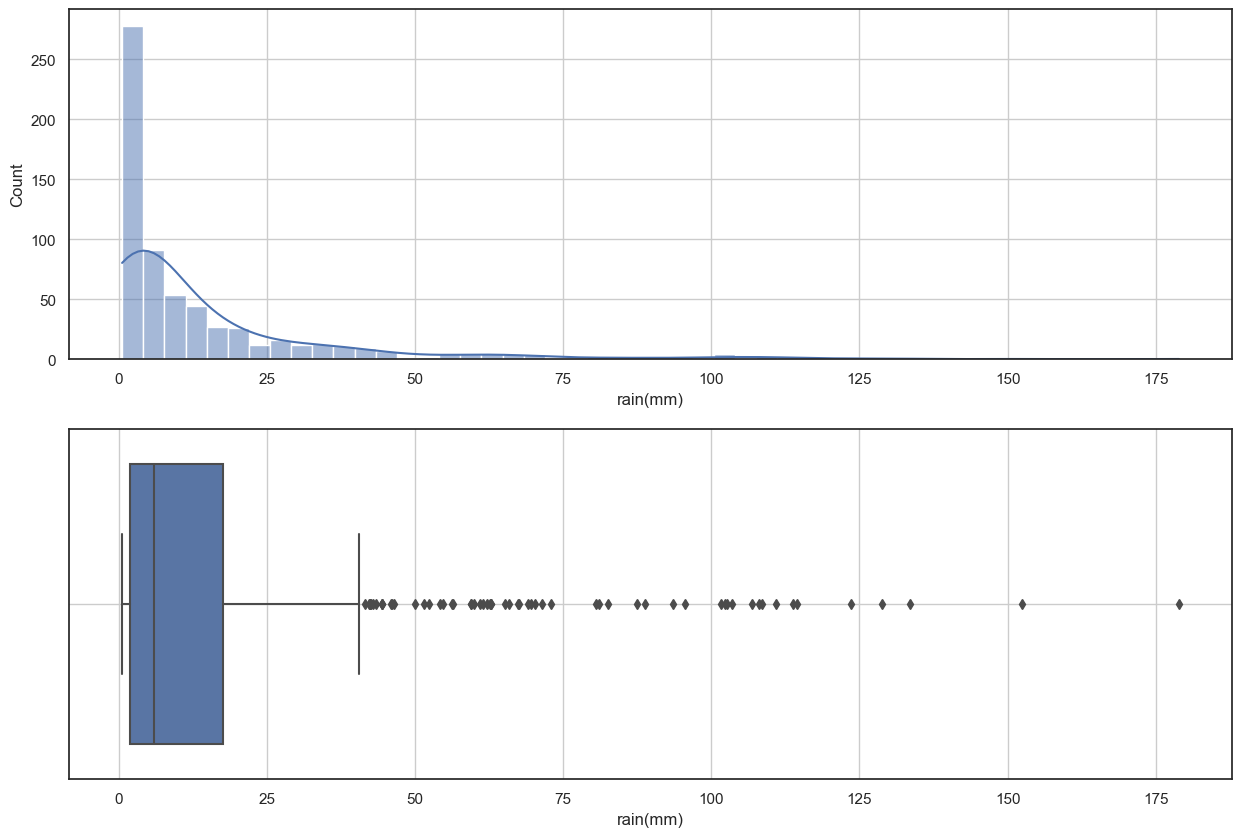

In [109]:
eda_1_n(data.loc[data[var]>0.5,:],var)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2803,0.959274
1.0,119,0.040726


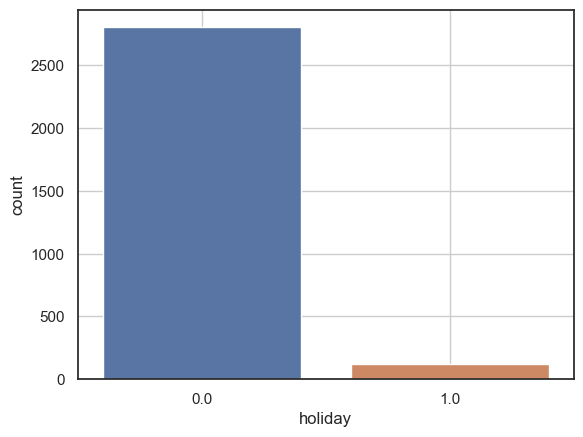

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var='holiday'
eda_1_c(data,var)


## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [111]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 1) 전체 상관계수 시각화

In [112]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True, fmt='.2f')
    plt.show()

In [113]:
# help(pd.DataFrame.corr)

,taxi_num,call_num,success,mean_time,mean_fee,mean_dit,month,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),board_rate,taxi_rate,holiday,mean_time_7days
taxi_num,1.0,0.885891,0.904666,0.036089,-0.844747,-0.857720,0.135439,0.243248,0.031597,0.108484,0.109463,0.002630,0.049139,0.087837,0.076662,-0.028390,-0.255970,-0.098883,-0.065827
call_num,0.0,1.000000,0.988755,0.292189,-0.850509,-0.847931,0.092307,0.001187,0.046876,0.058006,0.054040,-0.012803,-0.013773,-0.000970,0.024636,-0.251192,-0.585351,-0.110146,0.188554
success,0.0,0.000000,1.000000,0.184689,-0.868124,-0.858811,0.064552,0.001136,0.043544,0.064333,0.058319,-0.015746,-0.008007,0.005851,0.040669,-0.117494,-0.551939,-0.123238,0.081734
mean_time,0.0,0.000000,0.000000,1.000000,0.019297,-0.014108,0.280825,-0.125290,0.097899,0.040666,0.034177,-0.005636,-0.040354,-0.087185,-0.043917,-0.769957,-0.495070,-0.032531,0.842438
mean_fee,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977615,0.052620,-0.108540,-0.008714,0.083878,0.070715,0.011267,0.019761,-0.034833,0.008512,0.007470,0.358219,0.148362,0.121101
mean_dit,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.035079,-0.217624,-0.011655,0.088035,0.073781,0.004747,0.020487,-0.039444,-0.000987,0.047524,0.326151,0.159997,0.076391
month,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000868,0.009109,0.212798,0.243558,0.047296,0.157385,0.238150,-0.163377,-0.195046,-0.012567,-0.018378,0.329777
year,0.0,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000777,-0.013711,0.004806,0.051666,0.091284,0.167439,0.103597,0.053940,0.328339,0.002615,-0.144237
day,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.002151,0.004085,-0.021744,-0.024126,-0.006299,-0.017184,-0.031262,-0.047268,-0.092862,0.075539
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.961606,0.116850,0.306432,0.284732,0.475111,0.023777,-0.003184,-0.010583,0.041453


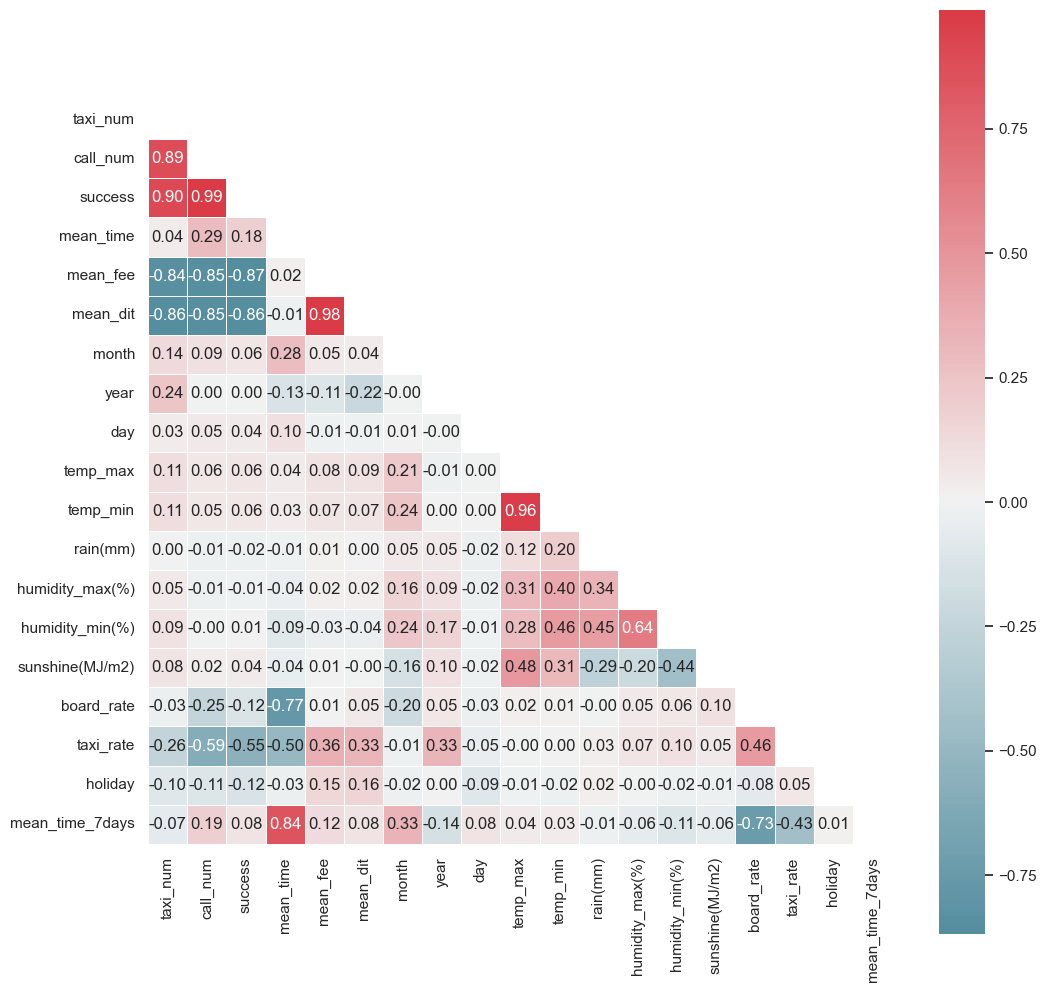

In [114]:

num_vars = ['taxi_num',
 'call_num',
 'success',
 'mean_time',
 'mean_fee',
 'mean_dit',
 'weekday',
 'month',
 'year',
 'day',
 'temp_max',
 'temp_min',
 'rain(mm)',
 'humidity_max(%)',
 'humidity_min(%)',
 'sunshine(MJ/m2)',
 'board_rate',
 'taxi_rate',
 'quarter',
 'holiday',
 'mean_time_7days']

eda_2_corr(data, num_vars)

In [115]:
# rain category feature 만들기
bins = [-1, 1, np.inf]
names = [0, 1]
data['rain'] = pd.cut(data['rain(mm)'], bins =bins, labels =names)
data['rain'].value_counts()

rain
0    2346
1     576
Name: count, dtype: int64

#### 2) 산점도

In [116]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (5,5))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

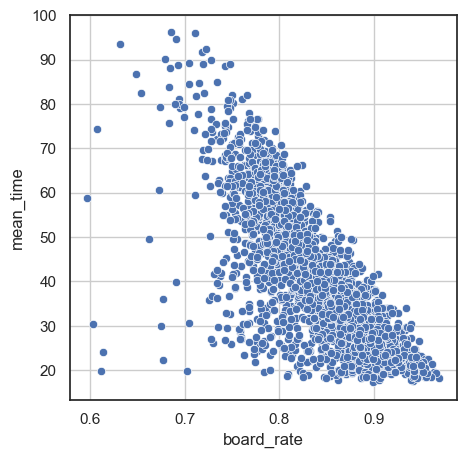

In [117]:

target='mean_time'
eda_2_nn(data, target, 'board_rate')

* fare

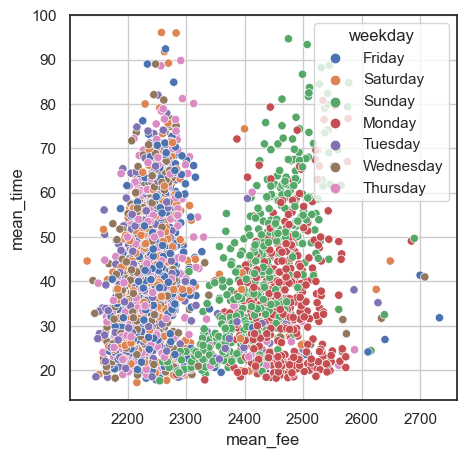

In [118]:
eda_2_nn(data, target, 'mean_fee', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 비유무

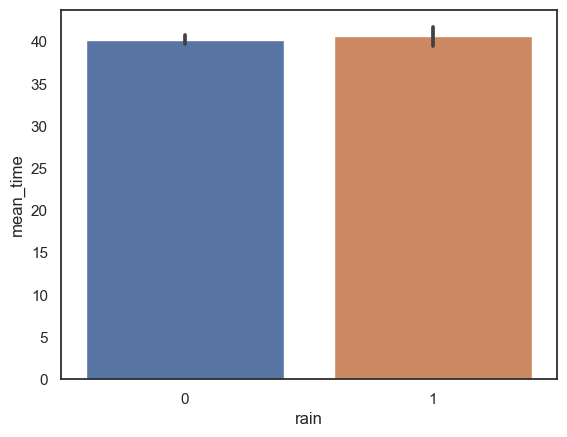

In [141]:
eda_2_cn(data,'rain','mean_time')

* 휴일 여부

In [119]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
def eda_2_cn(data, var, target='mean_time'):
    sns.barplot(x=var, y=target, data=data)


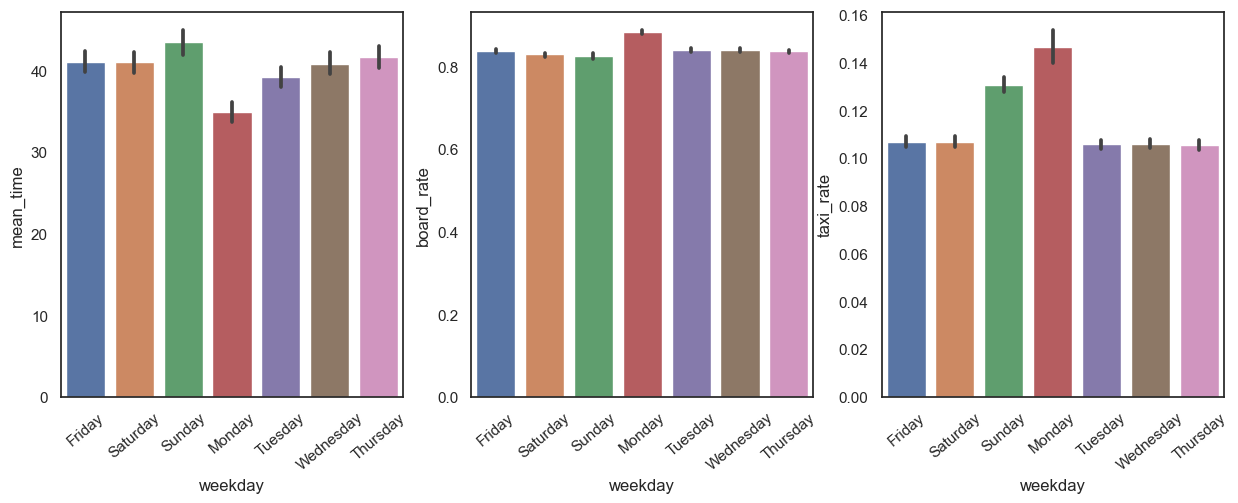

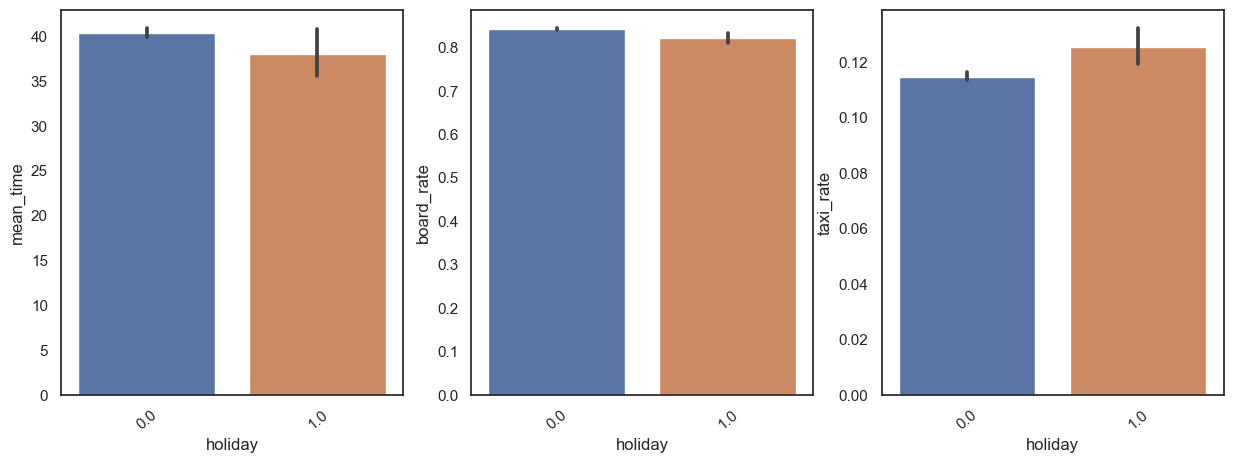

In [166]:
cop_list = ['mean_time', 'board_rate', 'taxi_rate']
plt.figure(figsize=(15,5))
var='weekday'
for i in range(len(cop_list)) :
    plt.subplot(1,3,i+1)
    target = cop_list[i]
    eda_2_cn(data, var, target)
    plt.xticks(rotation=40)
plt.show()
cop_list = ['mean_time', 'board_rate', 'taxi_rate']
plt.figure(figsize=(15,5))
var='holiday'
for i in range(len(cop_list)) :
    plt.subplot(1,3,i+1)
    target = cop_list[i]
    eda_2_cn(data, var, target)
    plt.xticks(rotation=40)
plt.show()

In [161]:
#dir(data['weekday'])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep

In [164]:
list(data['weekday'].unique())
wl = []
for w in list(data['weekday'].unique()) :
    temp = data.loc[data['weekday']==w,target]
    wl.append(temp)
spst.f_oneway(wl[0],wl[0],wl[1],wl[2],wl[3],wl[4],wl[5],wl[6])

F_onewayResult(statistic=87.41419931989293, pvalue=3.375005324357722e-117)

In [121]:
# t-test
h0 = data.loc[data['holiday']==0, target]
h1 = data.loc[data['holiday']==1, target]
spst.ttest_ind(h0, h1)

TtestResult(statistic=-2.9338730877838715, pvalue=0.003373690346567677, df=2920.0)

In [122]:
# 주말 여부와 board rate, taxi_rate 과 비교


* 요일

In [123]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [133]:
# anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', target]
w1 = temp.loc[temp['weekday']=='Tuesday', target]
w2 = temp.loc[temp['weekday']=='Wednesday', target]
w3 = temp.loc[temp['weekday']=='Thursday', target]
w4 = temp.loc[temp['weekday']=='Friday', target]
w5 = temp.loc[temp['weekday']=='Saturday', target]
w6 = temp.loc[temp['weekday']=='Sunday', target]

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=91.46360924282901, pvalue=1.761070478274722e-105)

* 계절

In [125]:
# sns.barplot(x = 'season', y = 'target', data = data)
# plt.grid()
# plt.show()

In [ ]:
d

In [145]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2921
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2922 non-null   datetime64[ns]
 1   taxi_num         2922 non-null   int64         
 2   call_num         2922 non-null   int64         
 3   success          2922 non-null   int64         
 4   mean_time        2922 non-null   float64       
 5   mean_fee         2922 non-null   int64         
 6   mean_dit         2922 non-null   int64         
 7   weekday          2922 non-null   object        
 8   month            2922 non-null   float64       
 9   year             2922 non-null   float64       
 10  day              2922 non-null   float64       
 11  temp_max         2922 non-null   float64       
 12  temp_min         2922 non-null   float64       
 13  rain(mm)         2922 non-null   float64       
 14  humidity_max(%)  2922 non-null   float64     

In [153]:
temp['quarter']=='1'

0        True
1        True
2        True
3        True
4        True
        ...  
2917    False
2918    False
2919    False
2920    False
2921    False
Name: quarter, Length: 2922, dtype: bool

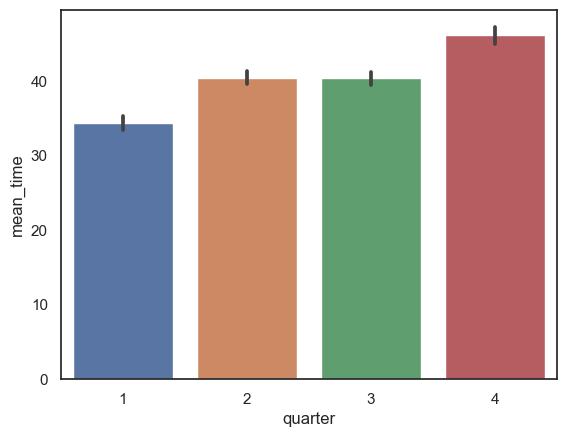

F_onewayResult(statistic=91.98829503119352, pvalue=7.017538751824503e-57)

In [156]:
# quarter 별 mean_time
eda_2_cn(data,'quarter','mean_time')
plt.show()

# anova
temp = data.loc[data['quarter'].notnull()]
target = 'mean_time'
s0 = temp.loc[temp['quarter']=='1', target]
s1 = temp.loc[temp['quarter']=='2', target]
s2 = temp.loc[temp['quarter']=='3', target]
s3 = temp.loc[temp['quarter']=='4', target]

spst.f_oneway(s0,s1,s2,s3)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
mean_time_7days, board_rate, taxi_rate, quarter, weekday


* 중간(약한) 관계의 변수

In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
month


* (거의) 관계가 없는 변수

In [129]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day, year, huminity 등


In [165]:
data.columns

Index(['Date', 'taxi_num', 'call_num', 'success', 'mean_time', 'mean_fee',
       'mean_dit', 'weekday', 'month', 'year', 'day', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'holiday', 'mean_time_7days', 'board_rate', 'taxi_rate', 'quarter',
       'next_mean_time', 'next_holiday', 'rain'],
      dtype='object')

In [168]:
# target 변수와 상관성이 낮은 변수들은 제외시킨다.
# 다중공선성을 위해 상관성이 높은 독립변수 사이를 처리해준다.
# data_copy = data.copy()
sel_cols = ['Date', 'weekday', 'month', 'year', 'humidity_min(%)',
       'holiday', 'mean_time_7days', 'board_rate', 'taxi_rate', 'quarter',
       'next_mean_time']
# data = data_copy
data = data.loc[:, sel_cols]
data.head(3)

,Date,weekday,month,year,humidity_min(%),holiday,mean_time_7days,board_rate,taxi_rate,quarter,next_mean_time
0,2015-01-01,Friday,1.0,2015.0,28.0,0.0,23.2,0.903226,0.208211,1,17.2
1,2015-01-02,Saturday,1.0,2015.0,37.0,0.0,20.2,0.898987,0.132996,1,26.2
2,2015-01-03,Sunday,1.0,2015.0,58.0,0.0,22.2,0.918689,0.126820,1,24.5


## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
joblib.dump(data, './data2.pkl')


['./data2.pkl']